# What is the most optimal skill to learn for Data Analysts?

### Methodology

1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

In [1]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Mei\anaconda3\envs\clean_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_aus = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'Australia')
].copy()

In [3]:
df_DA_aus = df_DA_aus.dropna(subset=['salary_year_avg'])

df_DA_aus_exploded = df_DA_aus.explode('job_skills')

df_DA_aus_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
42522,135000.0,sql
42522,135000.0,snowflake
42522,135000.0,tableau
407319,100500.0,sql
407319,100500.0,snowflake


In [4]:
df_DA_skills = df_DA_aus_exploded.groupby(['job_skills'])['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

# rename columns
df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count','median':'median_salary'})

df_DA_skills

,skill_count,median_salary
job_skills,,
sql,4,109500.0
excel,3,100500.0
snowflake,2,117750.0
bigquery,1,100500.0
c,1,57500.0
dax,1,100500.0
express,1,100500.0
go,1,118500.0
power bi,1,100500.0


In [5]:
DA_job_count = len(df_DA_aus)

# create new column
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count *100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,4,109500.0,100.0
excel,3,100500.0,75.0
snowflake,2,117750.0,50.0
bigquery,1,100500.0,25.0
c,1,57500.0,25.0
dax,1,100500.0,25.0
express,1,100500.0,25.0
go,1,118500.0,25.0
power bi,1,100500.0,25.0


6 [-0.78194345  0.33394784]
8 [0.53499319 0.79400702]


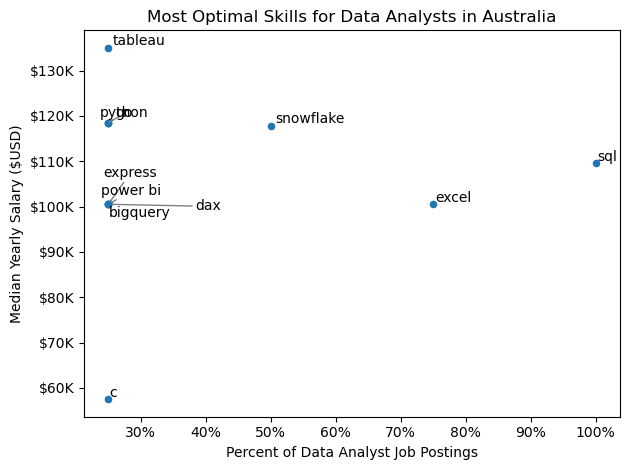

In [6]:
from adjustText import adjust_text


df_DA_skills_high_demand.plot(kind='scatter',x='skill_percent',y='median_salary')

# empty list to collect x and y values and label names in the for loop below
texts = []
# create a loop to find skill location (x,y)
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))


from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


# set axis labels, title and legend
plt.xlabel('Percent of Data Analyst Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in Australia')
plt.tight_layout()
plt.show()